#  Selenium

## 1. What is Selenium?
Selenium is a free automated testing framework used to validate web applications across different browsers and platforms.
It allows for using an automated web broswer, which can perform almost the same tasks as the manual one that we use every day.

The automated web browsed is suitable for testing web applications that require clicking buttons or filling forms. It can also be used for scraping where the data that needs to be scraped requires filling some forms (like a search bar) or navigating through pagination (page numbers).

## 2. Installing Selenium
The easiest way to install Selenium is through `pip` as follows:

`pip install selenium`

After installing Selenium, we need to install a driver for the automated web browser that we are going to use.
In this tutorial, I am going to use a Chrome driver. The driver can be downloaded from: https://sites.google.com/a/chromium.org/chromedriver/downloads

Note that there are several versions of the driver. It is important to choose the driver version same as your browser version that you have installed. In Chrome, you can check the driver version by going to the three dots at the top right corner, then selecting `help -> About Google Chrome`.

## 3. Usage
First we can start with the basic imports:

In [2]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

The `webdriver` is needed in order to connect the Chrome driver that we downloaded previously.

The `Keys` allows us to use various keys from the keyboard, as we will see in the examples.

In [7]:
path_to_driver = 'chromedriver'
driver = webdriver.Chrome(executable_path=path_to_driver)

In the first line we specify the path to the downloaded Chrome driver and in the second line we initialize the driver.

After running the above two cells, the Google Chrome broswer should open automatically.

Now, if we want to search for a specific web page, we can do it with the following command:

In [8]:
url = 'https://time.mk/st/vesti/makedonija/1'
driver.get(url)

On the top right corner of the web page, we can see a search bar. Lets say we want to automatically search something. We can do that with the following code:

In [9]:
elem = driver.find_element_by_name("q")
elem.send_keys("news")
elem.send_keys(Keys.RETURN)

Using the command `driver.find_element_by_name("q")`, we can get the search bar element.
We can see that it is searching based on the name in the HTML code.
We can see the name of the search bar by right clicking on it and selecting `inspect` as in the image below:

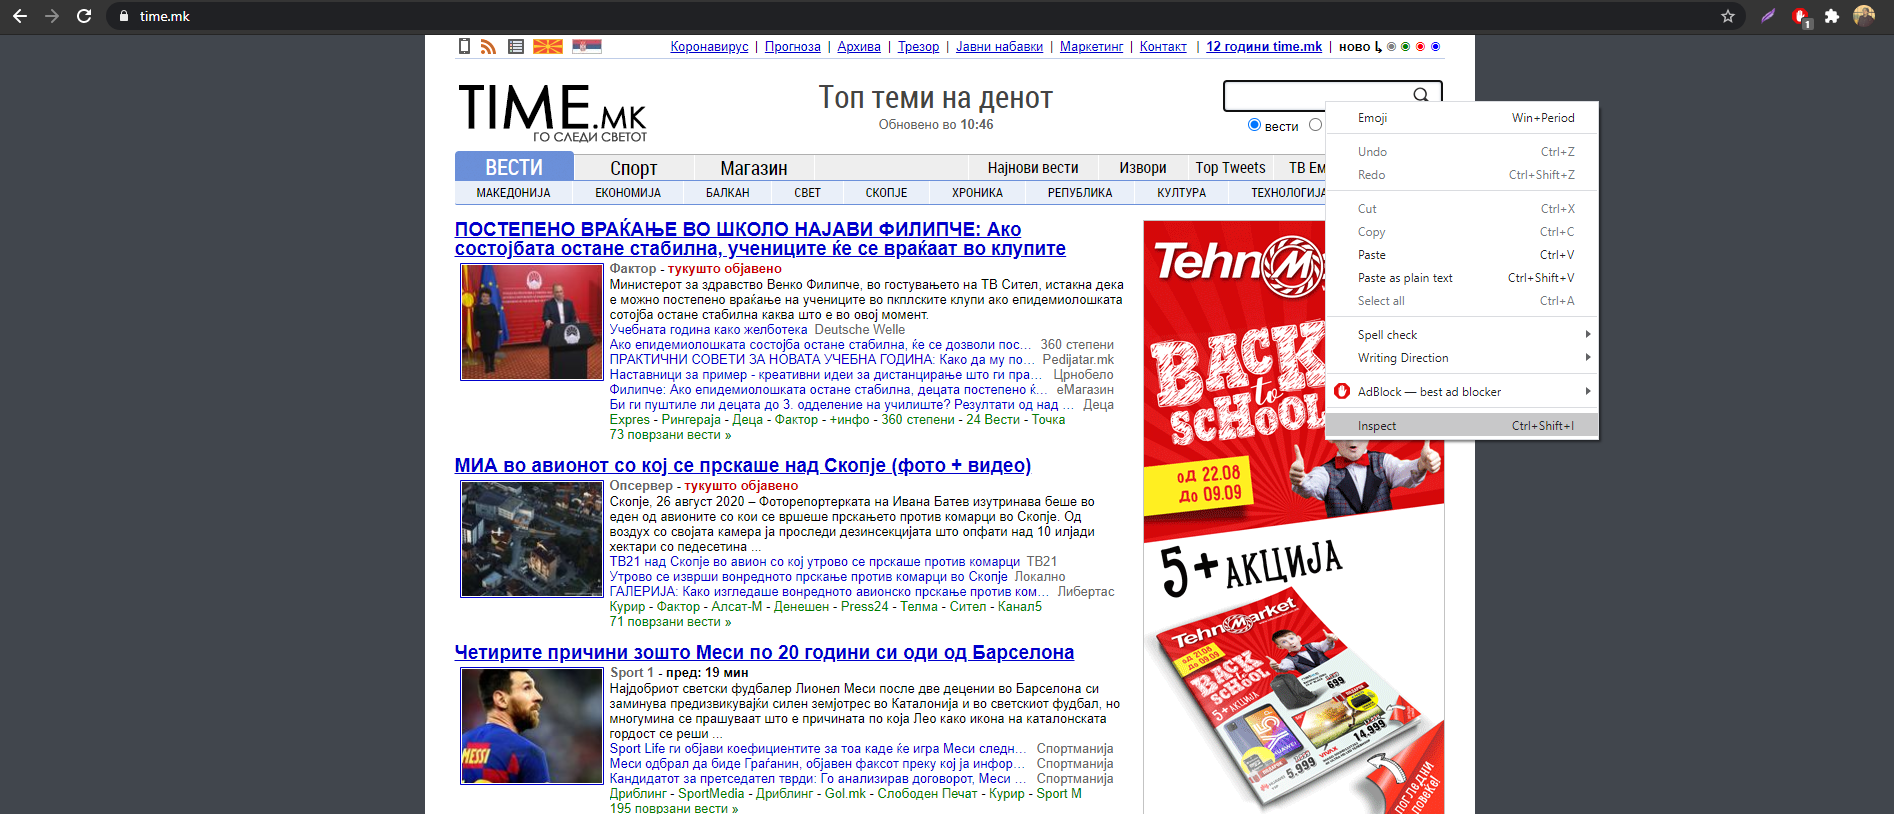

Next, we can see the page HTML, where we can find the name of the search bar, as shown in the image below:

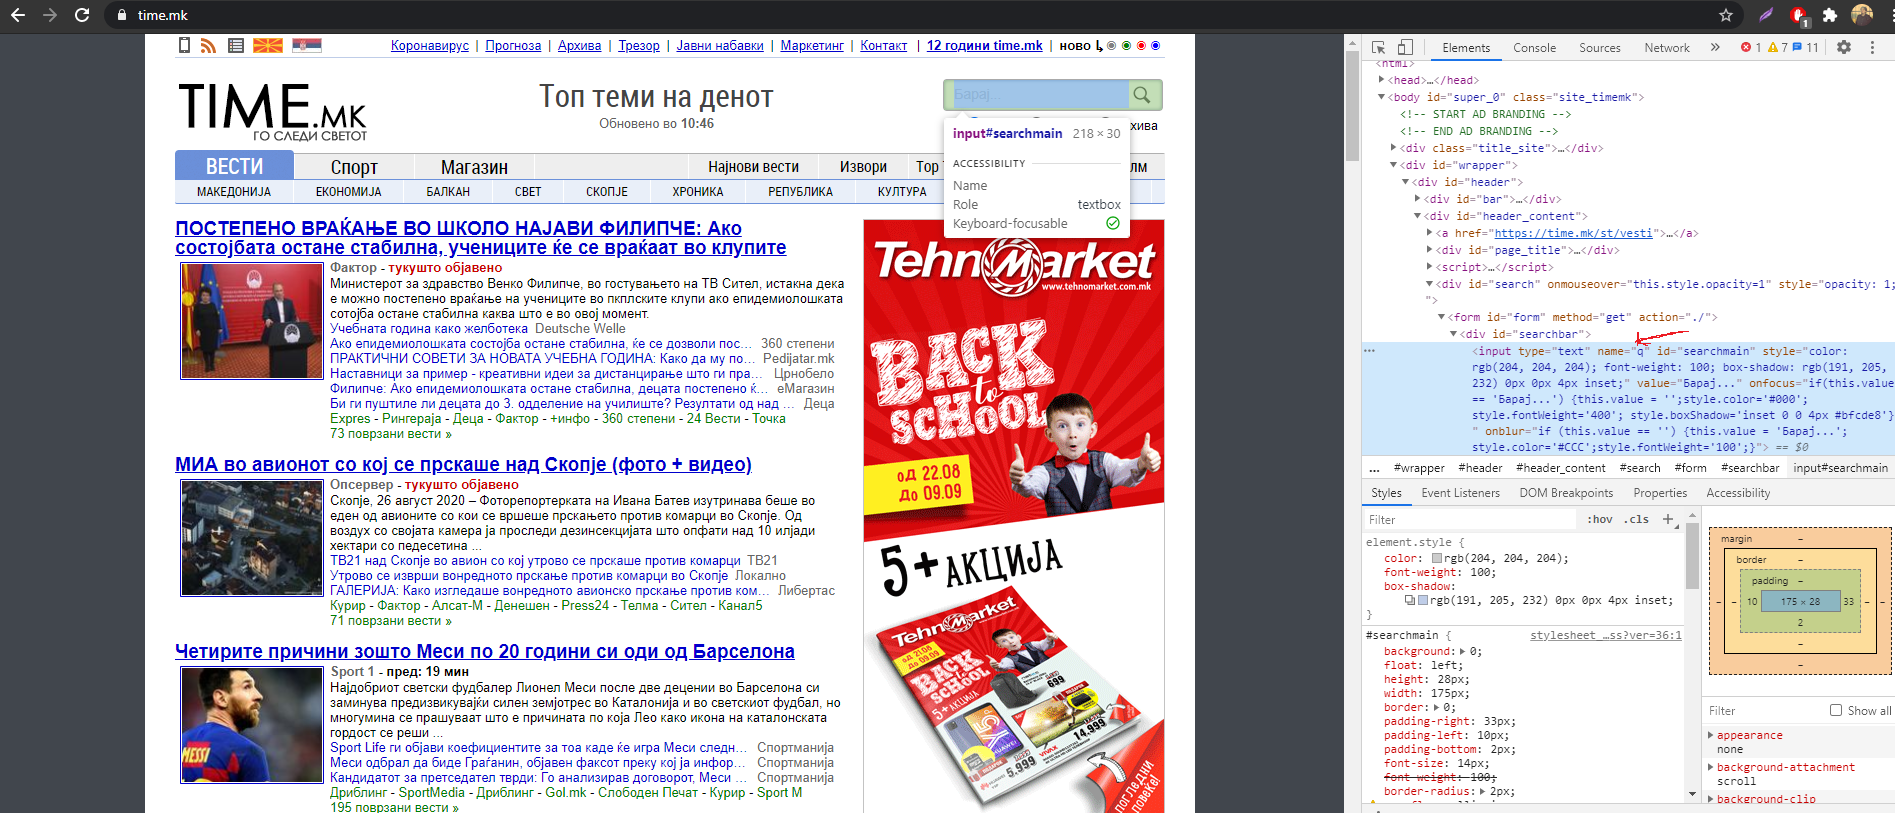

As we can see from the image above, the name of the search bar is `"q"`.

Next, we can write something in that search bar. We can do that using the `send_keys()` function that 
takes the search word as an argument. In our example we will search for the word `"news"`

Now, we want to search for that particular keyword. When we use the browser, we typically press `ENTER` (RETURN) to make the search. In Selenium terms, that can be done using the following command: `send_keys(Keys.RETURN)`.

The full code for the above example is shown in the next cell:


In [11]:
path_to_driver = 'chromedriver'
driver = webdriver.Chrome(executable_path=path_to_driver)

url = 'https://time.mk/st/vesti/makedonija/1'
driver.get(url)

elem = driver.find_element_by_name("q")
elem.send_keys("news")
elem.send_keys(Keys.RETURN)

Lets say we want to click a button. For example to click the button `"СВЕТ"`.
When we go right lick on the button and `inspect`, to see the HTML code, we can see that the button does not have an attribute `name`, so we can't use the `driver.find_element_by_name` command. We can see that it has an `id`, so we search by ID instead, as shown in the command below. To click the button we just call the `click()` function.

In [13]:
path_to_driver = 'chromedriver'
driver = webdriver.Chrome(executable_path=path_to_driver)

url = 'https://time.mk/st/vesti/makedonija/1'
driver.get(url)

elem = driver.find_element_by_id("c4")
elem.click()

After the button is clicked, we will be navigated to another URL. We can also notice that there is a page numbering.
Lets say we want to navigate to the next page. We can do that using the following example:

In [46]:
# navigate to the second page
news_panel = driver.find_element_by_id('news_pane')
pagination = news_panel.find_element_by_class_name('pagination')
all_pages = pagination.find_elements_by_tag_name('a')
all_pages[1].click()

If we inspect the HTML by right clicking on one of the page numbers, we can see that they are represented as links, like: 
`<a href='st/vesti/svet/2'>`.

We can notice that all the page numbers have a parent `div` element with class `pagination`. Since there are multiple elements in the web page that have the same class and we want to get exactly this pagination element, we can access the parent `div` of the `pagination`. We can see that the div element has an `id`, which is unique.

That is exactly what we are doing with the command `news_panel = driver.find_element_by_id('news_pane')`.
Now, we want to search for the child elements of the `div` element with `id=news_pane`. We do that using the command:
`pagination = news_panel.find_element_by_class_name('pagination')`.

Now we are at the pagination div that contains all the links which lead to next pages. We can get the list of all the links by searching for an HTML tag `a` as: `all_pages = pagination.find_elements_by_tag_name('a')`.
Notice also that now we call a slightly different function `find_elements`, instead of `find_element`, since we want to get all the links and not just one.

All the links that lead to next pages are sotred in the `all_pages` array. If we want to go to the second page, we can call: `all_pages[1].click()`

The whole code for clicking a button and navigating to the second page is shown in the next cell:

In [14]:
path_to_driver = 'chromedriver'
driver = webdriver.Chrome(executable_path=path_to_driver)

url = 'https://time.mk/st/vesti/makedonija/1'
driver.get(url)

elem = driver.find_element_by_id("c4")
elem.click()

# navigate to the second page
news_panel = driver.find_element_by_id('news_pane')
pagination = news_panel.find_element_by_class_name('pagination')
all_pages = pagination.find_elements_by_tag_name('a')
all_pages[1].click()

As we saw in the examples above, Selenium has various ways of accessing elements. The whole list of ways of accessing elements can be found here: https://selenium-python.readthedocs.io/locating-elements.html